In [ ]:
import uproot
import hist
from hist import Hist
import matplotlib.pyplot as plt
import mplhep

In [ ]:
mplhep.style.use("CMS")

In [ ]:
#https://hist.readthedocs.io/en/latest/user-guide/notebooks/Plots.html
ttree = 'obje;1'
var_x = 'jpsi_dstar_mass'
name_x = 'mass'
name_y = "rap"
var_y = 'jpsi_dstar_deltarap'
label_x = r"$M_{J/\psi D*}$ [GeV/$c^2$]"
label_y = r"$\Delta y_{J/\psi D*}$"

In [ ]:
def get_data(path_file, ttree, var_x, var_y):
    
    with uproot.open(path_file) as f:
        #print(f.classnames())
        # Takes the ttree objec (defined in save_ttree.py script)
        tree_obj = f[ttree]
        # Takes its arrays
        branch_obj = tree_obj.arrays()
        
        # Takes the composed object inv mass
        jpsi_dstar_mass = branch_obj[var_x]
        # Takes the composed object delta y    
        jpsi_dstar_deltarap = branch_obj[var_y]
        
        return jpsi_dstar_mass, jpsi_dstar_deltarap

In [ ]:
def plot_hist(var_x, var_y, h_range, bin_inv_mass):
    
    hist_2d = hist.Hist(hist.axis.Regular(bin_inv_mass, 0, 100, name=name_x, label=label_x), 
                      hist.axis.Regular(100, -5, 5, name=name_y, label=label_y))   
    hist_2d.fill(mass=var_x, rap=var_y)
    
    #fig = plt.figure()
    #fig.clear()
    #ax = fig.add_subplot()
    
    hist_2d_2 = hist_2d[h_range[0][0]:h_range[0][1], h_range[1][0]:h_range[1][1]]
    #mplhep.histplot(hist_2d_2.project("mass"), ax=axs[0])
    #mplhep.hist2dplot(hist_2d_2, ax=ax)
    
    #fig, ax = plt.subplots(figsize=(6, 6))

    #hist_2d_2.plot2d(ax=ax, cmap="plasma")
    
    plt.figure(figsize=(12, 12))

    hist_2d_2.plot2d_full(
        main_cmap="turbo", #Goods: turbo, pink , ocean  #'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone','pink', 'spring', 'summer', 'autumn', 'winter', 'cool','Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'
        top_ls="--",       # https://matplotlib.org/stable/tutorials/colors/colormaps.html
        top_color="orange",
        top_lw=2,
        side_ls=":",
        side_lw=2,
        side_color="steelblue",
    )

    plt.show()
    

In [ ]:
################# Test

In [ ]:
#https://hist.readthedocs.io/en/latest/user-guide/notebooks/Plots.html
ttree = 'obje;1'
var_x = 'jpsi_dstar_mass'
name_x = 'mass'
name_y = "rap"
var_y = 'jpsi_dstar_deltarap'
label_x = r"$M_{J/\psi D*}$ [GeV/$c^2$]"
label_y = r"$\Delta y_{J/\psi D*}$"

In [ ]:
hist_1d = hist.Hist(hist.axis.Regular(150, 0, 100, name=name_x, label=label_x))  
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/fit/data_root_files/2017/Charmonium2017_HLT_Dimuon25_vtx0p05.root'
x, y = get_data(path_file, ttree, var_x, var_y)
hist_1d.fill(x)
fig, ax = plt.subplots()
mplhep.cms.label('Preliminary', data=True, lumi=41.48, year=2017)
mplhep.histplot(hist_1d, histtype='errorbar')
ax.set_ylabel('Counts')

# 2016

## 2D plots

### Invariant mass: 0 to 100 GeV/c$^2$

In [ ]:
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/2016/vertex_analysis/OniaOpenCharmRun2ULAna/fit/data_root_files/Charmonium2016ALL_HLT_Dimu.root'
x, y = get_data(path_file, ttree, var_x, var_y)
h_range = [[0, 400], [None, None]] #h_range = [[mass_inf, mass_sup], [delta_rap_inf, delta_rap_sup]]
plot_hist(x, y, h_range, 140)

### Invariant mass: 0 to 60 GeV/c$^2$

In [ ]:
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/2016/vertex_analysis/OniaOpenCharmRun2ULAna/fit/data_root_files/Charmonium2016ALL_HLT_Dimu.root'
x, y = get_data(path_file, ttree, var_x, var_y)
h_range = [[0, 100], [None, None]] #h_range = [[mass_inf, mass_sup], [delta_rap_inf, delta_rap_sup]]
plot_hist(x, y, h_range, 200)

### Invariant mass: 0 to 20 GeV/c$^2$

In [ ]:
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/2016/vertex_analysis/OniaOpenCharmRun2ULAna/fit/data_root_files/Charmonium2016ALL_HLT_Dimu.root'
x, y = get_data(path_file, ttree, var_x, var_y)
h_range = [[0, 70], [None, None]] #h_range = [[mass_inf, mass_sup], [delta_rap_inf, delta_rap_sup]]
plot_hist(x, y, h_range, 300)
## The histogram bin might change !!

### Invariant mass: 15 to 100 GeV/c$^2$

In [ ]:
path_file = 'Charmonium_2016_All_HLT_Dimuon20_asso_study.root'
x, y = get_data(path_file, ttree, var_x, var_y)
h_range = [[50, 400], [None, None]] #h_range = [[mass_inf, mass_sup], [delta_rap_inf, delta_rap_sup]]
plot_hist(x, y, h_range,)

## 1D plots

### Invariant mass 

In [ ]:
hist_1d = hist.Hist(hist.axis.Regular(150, 0, 100, name=name_x, label=label_x))  
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/2016/vertex_analysis/OniaOpenCharmRun2ULAna/fit/data_root_files/Charmonium2016ALL_HLT_Dimu.root'
x, y = get_data(path_file, ttree, var_x, var_y)
hist_1d.fill(x)
fig, ax = plt.subplots()
mplhep.cms.label('Preliminary', data=True, lumi=36.31, year=2016)
mplhep.histplot(hist_1d, histtype='errorbar')
ax.set_ylabel('Counts')

### First peak study

In [ ]:
hist_1d = hist.Hist(hist.axis.Regular(150, 5, 10, name=name_x, label=label_x))  
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/2016/vertex_analysis/OniaOpenCharmRun2ULAna/fit/data_root_files/Charmonium2016ALL_HLT_Dimu.root'
x, y = get_data(path_file, ttree, var_x, var_y)
hist_1d.fill(x)
fig, ax = plt.subplots()
mplhep.cms.label('Preliminary', data=True, lumi=36.32, year=2016)
mplhep.histplot(hist_1d, histtype='errorbar')
ax.set_ylabel('Counts')

### Second peak study

In [ ]:
hist_1d = hist.Hist(hist.axis.Regular(200, 15, 100, name=name_x, label=label_x))  
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/2016/vertex_analysis/OniaOpenCharmRun2ULAna/fit/data_root_files/Charmonium2016ALL_HLT_Dimu.root'
x, y = get_data(path_file, ttree, var_x, var_y)
hist_1d.fill(x)
fig, ax = plt.subplots()
mplhep.cms.label('Preliminary', data=True, lumi=36.32, year=2016)
mplhep.histplot(hist_1d, histtype='errorbar')
ax.set_ylabel('Counts')

### $\Delta$y 

In [ ]:
hist_1d = hist.Hist(hist.axis.Regular(150, -5, 5, name=name_y, label=label_y))  
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/2016/vertex_analysis/OniaOpenCharmRun2ULAna/fit/data_root_files/Charmonium2016ALL_HLT_Dimu.root'
x, y = get_data(path_file, ttree, var_x, var_y)
hist_1d.fill(y)
fig, ax = plt.subplots()
mplhep.cms.label('Preliminary', data=True, lumi=36.31, year=2016)
mplhep.histplot(hist_1d, histtype='errorbar')
ax.set_ylabel('Counts')

# 2017

## 2D plots

### Invariant mass: 0 to 100 GeV/c$^2$

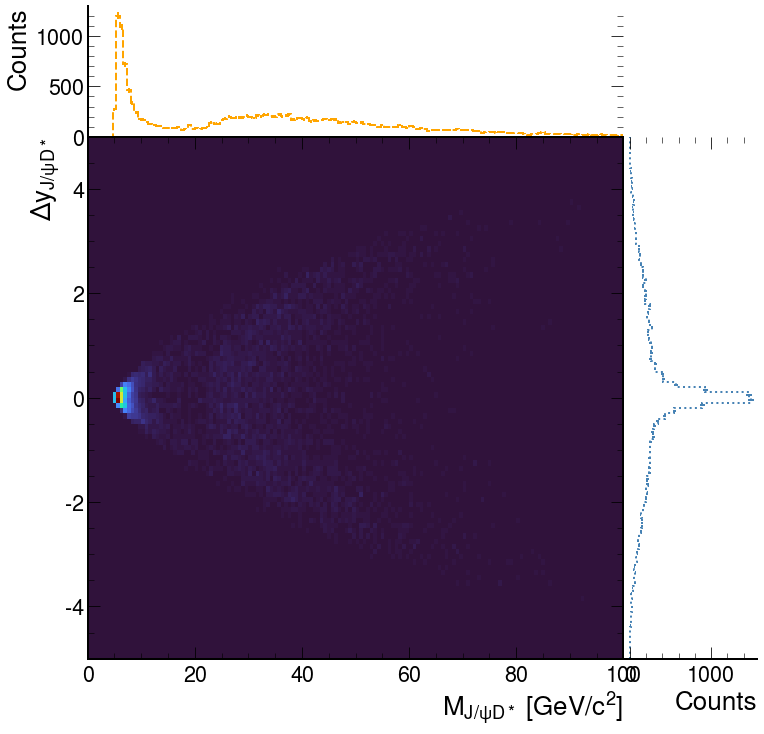

In [10]:
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/fit/data_root_files/2017/Charmonium2017_HLT_Dimuon25_vtx0p05.root'
x, y = get_data(path_file, ttree, var_x, var_y)
h_range = [[0, 400], [None, None]] #h_range = [[mass_inf, mass_sup], [delta_rap_inf, delta_rap_sup]]
plot_hist(x, y, h_range, 150)

### Invariant mass: 0 to 60 GeV/c$^2$

In [ ]:
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/2017/vertex_analysis/OniaOpenCharmRun2ULAna/fit/data_root_files/Charmonium2017_HLT_Dimuon25.root'
x, y = get_data(path_file, ttree, var_x, var_y)
h_range = [[0, 100], [None, None]] #h_range = [[mass_inf, mass_sup], [delta_rap_inf, delta_rap_sup]]
plot_hist(x, y, h_range, 160)

### Invariant mass: 0 to 20 GeV/c$^2$

In [ ]:
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/2017/vertex_analysis/OniaOpenCharmRun2ULAna/fit/data_root_files/Charmonium2017_HLT_Dimuon25.root'
x, y = get_data(path_file, ttree, var_x, var_y)
h_range = [[0, 50], [None, None]] #h_range = [[mass_inf, mass_sup], [delta_rap_inf, delta_rap_sup]]
plot_hist(x, y, h_range, 200)

### Invariant mass: 15 to 100 GeV/c$^2$

In [ ]:
path_file = 'Charmonium_2017_All_HLT_Dimuon25_asso_study.root'
x, y = get_data(path_file, ttree, var_x, var_y)
h_range = [[50, 400], [None, None]] #h_range = [[mass_inf, mass_sup], [delta_rap_inf, delta_rap_sup]]
plot_hist(x, y, h_range,)

## 1D plots

### Invariant mass

Text(52.5, 1, 'Counts')

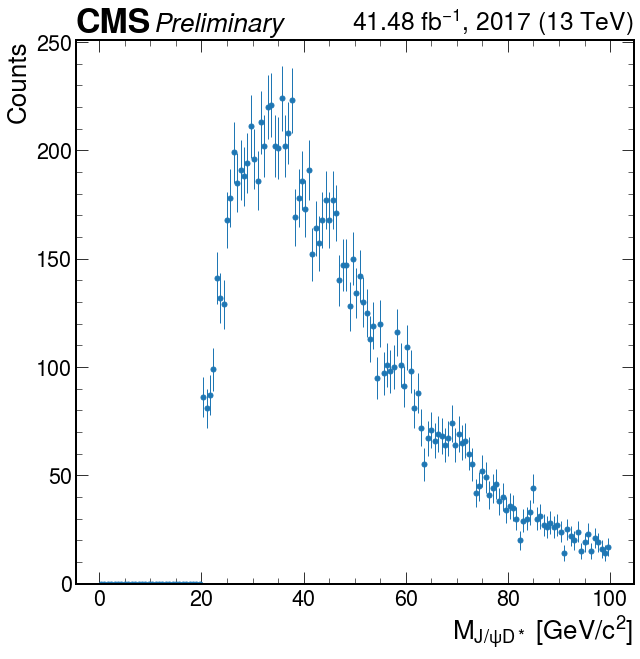

In [14]:
hist_1d = hist.Hist(hist.axis.Regular(150, 0, 100, name=name_x, label=label_x))  
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/fit/data_root_files/2017/Charmonium2017_HLT_Dimuon25_inv_mass.root'
x, y = get_data(path_file, ttree, var_x, var_y)
hist_1d.fill(x)
fig, ax = plt.subplots()
mplhep.cms.label('Preliminary', data=True, lumi=41.48, year=2017)
mplhep.histplot(hist_1d, histtype='errorbar')
ax.set_ylabel('Counts')

### First peak study

In [ ]:
hist_1d = hist.Hist(hist.axis.Regular(150, 5, 10, name=name_x, label=label_x))  
path_file = 'Charmonium_2017_All_HLT_Dimuon25_asso_study.root'
x, y = get_data(path_file, ttree, var_x, var_y)
hist_1d.fill(x)
fig, ax = plt.subplots()
mplhep.cms.label('Preliminary', data=True, lumi=41.53, year=2017)
mplhep.histplot(hist_1d, histtype='errorbar')
ax.set_ylabel('Counts')

### Second peak study

In [ ]:
hist_1d = hist.Hist(hist.axis.Regular(200, 15, 100, name=name_x, label=label_x))  
path_file = 'Charmonium_2017_All_HLT_Dimuon25_asso_study.root'
x, y = get_data(path_file, ttree, var_x, var_y)
hist_1d.fill(x)
fig, ax = plt.subplots()
mplhep.cms.label('Preliminary', data=True, lumi=41.53, year=2017)
mplhep.histplot(hist_1d, histtype='errorbar')
ax.set_ylabel('Counts')

### $\Delta$y 

In [ ]:
hist_1d = hist.Hist(hist.axis.Regular(150, -5, 5, name=name_y, label=label_y))  
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/2017/vertex_analysis/OniaOpenCharmRun2ULAna/fit/data_root_files/Charmonium2017_HLT_Dimuon25.root'
x, y = get_data(path_file, ttree, var_x, var_y)
hist_1d.fill(y)
fig, ax = plt.subplots()
mplhep.cms.label('Preliminary', data=True, lumi=41.48, year=2017)
mplhep.histplot(hist_1d, histtype='errorbar')
ax.set_ylabel('Counts')

# 2018

## 2D plots

### Invariant mass: 0 to 100 GeV/c$^2$

In [ ]:
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/2018/vertex_analysis/OniaOpenCharmRun2ULAna/fit/data_root_files/Charmonium2018_HLT_Dimuon25.root'
x, y = get_data(path_file, ttree, var_x, var_y)
h_range = [[0, 400], [None, None]] #h_range = [[mass_inf, mass_sup], [delta_rap_inf, delta_rap_sup]]
plot_hist(x, y, h_range, 150)

### Invariant mass: 0 to 60 GeV/c$^2$

In [ ]:
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/2018/vertex_analysis/OniaOpenCharmRun2ULAna/fit/data_root_files/Charmonium2018_HLT_Dimuon25.root'
x, y = get_data(path_file, ttree, var_x, var_y)
h_range = [[0, 100], [None, None]] #h_range = [[mass_inf, mass_sup], [delta_rap_inf, delta_rap_sup]]
plot_hist(x, y, h_range, 150)

### Invariant mass: 0 to 20 GeV/c$^2$

In [ ]:
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/2018/vertex_analysis/OniaOpenCharmRun2ULAna/fit/data_root_files/Charmonium2018_HLT_Dimuon25.root'
x, y = get_data(path_file, ttree, var_x, var_y)
h_range = [[0, 50], [None, None]] #h_range = [[mass_inf, mass_sup], [delta_rap_inf, delta_rap_sup]]
plot_hist(x, y, h_range, 200)

### Invariant mass: 0 to 20 GeV/c$^2$

In [ ]:
path_file = 'Charmonium_2018_All_HLT_Dimuon25_asso_study.root'
x, y = get_data(path_file, ttree, var_x, var_y)
h_range = [[50, 400], [None, None]] #h_range = [[mass_inf, mass_sup], [delta_rap_inf, delta_rap_sup]]
plot_hist(x, y, h_range,)

## 1D plots

### Invariant mass 

In [ ]:
hist_1d = hist.Hist(hist.axis.Regular(150, 5, 100, name=name_x, label=label_x))  
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/2018/vertex_analysis/OniaOpenCharmRun2ULAna/fit/data_root_files/Charmonium2018_HLT_Dimuon25.root'
x, y = get_data(path_file, ttree, var_x, var_y)
hist_1d.fill(x)
fig, ax = plt.subplots()
mplhep.cms.label('Preliminary', data=True, lumi=59.76, year=2018)
mplhep.histplot(hist_1d, histtype='errorbar')
ax.set_ylabel('Counts')

### First peak study

hist_1d = hist.Hist(hist.axis.Regular(150, 5, 10, name=name_x, label=label_x))  
path_file = 'Charmonium_2018_All_HLT_Dimuon25_asso_study.root'
x, y = get_data(path_file, ttree, var_x, var_y)
hist_1d.fill(x)
fig, ax = plt.subplots()
mplhep.cms.label('Preliminary', data=True, lumi=57.69, year=2018)
mplhep.histplot(hist_1d, histtype='errorbar')
ax.set_ylabel('Counts')

#### Second peak study

In [ ]:
hist_1d = hist.Hist(hist.axis.Regular(200, 15, 100, name=name_x, label=label_x))  
path_file = 'Charmonium_2018_All_HLT_Dimuon25_asso_study.root'
x, y = get_data(path_file, ttree, var_x, var_y)
hist_1d.fill(x)
fig, ax = plt.subplots()
mplhep.cms.label('Preliminary', data=True, lumi=57.69, year=2018)
mplhep.histplot(hist_1d, histtype='errorbar')
ax.set_ylabel('Counts')

### $\Delta$y 

In [ ]:
hist_1d = hist.Hist(hist.axis.Regular(150, -5, 5, name=name_y, label=label_y))  
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/2018/vertex_analysis/OniaOpenCharmRun2ULAna/fit/data_root_files/Charmonium2018_HLT_Dimuon25.root'
x, y = get_data(path_file, ttree, var_x, var_y)
hist_1d.fill(y)
fig, ax = plt.subplots()
mplhep.cms.label('Preliminary', data=True, lumi=59.76, year=2018)
mplhep.histplot(hist_1d, histtype='errorbar')
ax.set_ylabel('Counts')

# DPS MC 2017

## 2D plots

### Invariant mass: 0 to 100 GeV/c$^2$

In [ ]:
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_monte_carlo/2017/DPS/fit/data_root_files/50to100_HLT_Dimuon25.root'
x, y = get_data(path_file, ttree, var_x, var_y)
h_range = [[0, 400], [None, None]] #h_range = [[mass_inf, mass_sup], [delta_rap_inf, delta_rap_sup]]
plot_hist(x, y, h_range, 60)

## 1D plots

#### Second peak study

In [ ]:
hist_1d = hist.Hist(hist.axis.Regular(85, 10, 100, name=name_x, label=label_x))  
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_monte_carlo/2017/fit/data_root_files/DPS_MC_2017_10to30_no_trigger_asso_study.root'
x, y = get_data(path_file, ttree, var_x, var_y)
hist_1d.fill(x)
fig, ax = plt.subplots()
mplhep.cms.label(data=False,)
mplhep.histplot(hist_1d, histtype='step')
ax.set_ylabel('Counts')

# SPS MC 2017

## 2D plots

### Invariant mass: 0 to 100 GeV/c$^2$

In [ ]:
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_monte_carlo/2017/SPS/fit/data_root_files/SPS_MC_2017_Jpsi_ccbar_3FS_no_trigger_asso_study.root'
x, y = get_data(path_file, ttree, var_x, var_y)
h_range = [[0, 400], [None, None]] #h_range = [[mass_inf, mass_sup], [delta_rap_inf, delta_rap_sup]]
plot_hist(x, y, h_range, 100)

## 1D plots

#### First peak study

In [ ]:
hist_1d = hist.Hist(hist.axis.Regular(80, 0, 100, name=name_x, label=label_x))  
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_monte_carlo/2017/SPS/fit/data_root_files/SPS_MC_2017_Jpsi_ccbar_3FS_no_trigger_asso_study.root'
x, y = get_data(path_file, ttree, var_x, var_y)
hist_1d.fill(x)
fig, ax = plt.subplots()
mplhep.cms.label(data=False)
mplhep.histplot(hist_1d, histtype='step')
ax.set_ylabel('Counts')

#### Second peak study

In [ ]:
hist_1d = hist.Hist(hist.axis.Regular(85, 10, 100, name=name_x, label=label_x))  
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_monte_carlo/2017/SPS/fit/data_root_files/SPS_MC_2017_Jpsi_ccbar_3FS_no_trigger_asso_study.root'
x, y = get_data(path_file, ttree, var_x, var_y)
hist_1d.fill(x)
fig, ax = plt.subplots()
mplhep.cms.label(data=False,)
mplhep.histplot(hist_1d, histtype='step')
ax.set_ylabel('Counts')

# TESTSSSSSSSSSSSSSSSS

In [ ]:
#def plot(path_file, ttree, var_x, name_x, label_x, data):

In [ ]:
#https://hist.readthedocs.io/en/latest/user-guide/notebooks/Plots.html
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/fit/data_root_files/2017/2017_HLT_Dimuon25_d0.root'
ttree = 'asso;1'
var_x = 'dstar_d0dl'
name_x = 'd0dl'
#name_y = "rap"
#var_y = 'jpsi_dstar_deltarap'
label_x = r"D$^0$ from D$^*$: Decay length [mm]"
#label_y = r"$\Delta y_{J/\psi D*}$"

with uproot.open(path_file) as f:
    #print(f.classnames())
    # Takes the ttree objec (defined in save_ttree.py script)
    tree_obj = f[ttree]
    # Takes its arrays
    branch_obj = tree_obj.arrays()

    # Takes the composed object inv mass
    dstar_d0dl = branch_obj[var_x]
    # Takes the composed object delta y    
    #jpsi_dstar_deltarap = branch_obj[var_y]
hist_1d = hist.Hist(hist.axis.Regular(80, 0, 1.5, name=name_x, label=label_x))  
hist_1d.fill(dstar_d0dl)
fig, ax = plt.subplots()

label = plt.text(0.05, 0.93, r"2017 Data - 41.48 fb$^{-1}$",
                      fontsize=22,
                      fontweight='bold',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )

mplhep.cms.label(data=True,)
mplhep.histplot(hist_1d, histtype='step')
ax.set_ylabel('Counts')
ax.set_ylim(0, 2500)

In [ ]:
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/fit/data_root_files/2017/9to30_HLT_Dimuon25_d0dl.root'
ttree = 'asso;1'
var_x = 'dstar_d0dl'
name_x = 'd0dl'
#name_y = "rap"
#var_y = 'jpsi_dstar_deltarap'
label_x = r"D$^0$ from D$^*$: Decay length"
#label_y = r"$\Delta y_{J/\psi D*}$"

with uproot.open(path_file) as f:
    #print(f.classnames())
    # Takes the ttree objec (defined in save_ttree.py script)
    tree_obj = f[ttree]
    # Takes its arrays
    branch_obj = tree_obj.arrays()

    # Takes the composed object inv mass
    dstar_d0dl = branch_obj[var_x]
    # Takes the composed object delta y    
    #jpsi_dstar_deltarap = branch_obj[var_y]
hist_1d = hist.Hist(hist.axis.Regular(80, 0, 1.5, name=name_x, label=label_x))  
hist_1d.fill(dstar_d0dl)

fig, ax = plt.subplots()

label = plt.text(0.05, 0.93, r"DPS - 25 < MC: p$_T^{J/\psi}$ < 30 GeV/c",
                      fontsize=22,
                      fontweight='bold',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )

mplhep.cms.label(data=False,)
mplhep.histplot(hist_1d, histtype='step')
ax.set_ylabel('Counts')
ax.set_ylim(0, 150)

In [ ]:
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/fit/data_root_files/2017/30to50_HLT_Dimuon25_d0dl.root'
ttree = 'asso;1'
var_x = 'dstar_d0dl'
name_x = 'd0dl'
#name_y = "rap"
#var_y = 'jpsi_dstar_deltarap'
label_x = r"D$^0$ from D$^*$: Decay length"
#label_y = r"$\Delta y_{J/\psi D*}$"

with uproot.open(path_file) as f:
    #print(f.classnames())
    # Takes the ttree objec (defined in save_ttree.py script)
    tree_obj = f[ttree]
    # Takes its arrays
    branch_obj = tree_obj.arrays()

    # Takes the composed object inv mass
    dstar_d0dl = branch_obj[var_x]
    # Takes the composed object delta y    
    #jpsi_dstar_deltarap = branch_obj[var_y]
hist_1d = hist.Hist(hist.axis.Regular(120, 0, 50, name=name_x, label=label_x))  
hist_1d.fill(dstar_d0dl)

fig, ax = plt.subplots()

label = plt.text(0.05, 0.93, r"DPS - 30 < MC: p$_T^{J/\psi}$ < 50 GeV/c",
                      fontsize=22,
                      fontweight='bold',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )

mplhep.cms.label(data=False,)
mplhep.histplot(hist_1d, histtype='step')
ax.set_ylabel('Counts')
ax.set_ylim(0, 2000)

In [ ]:
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/fit/data_root_files/2017/50to100_HLT_Dimuon25_d0dl.root'
ttree = 'asso;1'
var_x = 'dstar_d0dl'
name_x = 'd0dl'
#name_y = "rap"
#var_y = 'jpsi_dstar_deltarap'
label_x = r"D$^0$ from D$^*$: Decay length"
#label_y = r"$\Delta y_{J/\psi D*}$"

with uproot.open(path_file) as f:
    #print(f.classnames())
    # Takes the ttree objec (defined in save_ttree.py script)
    tree_obj = f[ttree]
    # Takes its arrays
    branch_obj = tree_obj.arrays()

    # Takes the composed object inv mass
    dstar_d0dl = branch_obj[var_x]
    # Takes the composed object delta y    
    #jpsi_dstar_deltarap = branch_obj[var_y]
hist_1d = hist.Hist(hist.axis.Regular(120, 0, 50, name=name_x, label=label_x))  
hist_1d.fill(dstar_d0dl)

fig, ax = plt.subplots()

label = plt.text(0.05, 0.93, r"DPS - 50 < MC: p$_T^{J/\psi}$ < 100 GeV/c",
                      fontsize=22,
                      fontweight='bold',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )

mplhep.cms.label(data=False,)
mplhep.histplot(hist_1d, histtype='step')
ax.set_ylabel('Counts')
ax.set_ylim(0, 1100)

In [ ]:
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/fit/data_root_files/2017/100to150_HLT_Dimuon25_d0dl.root'
ttree = 'asso;1'
var_x = 'dstar_d0dl'
name_x = 'd0dl'
#name_y = "rap"
#var_y = 'jpsi_dstar_deltarap'
label_x = r"D$^0$ from D$^*$: Decay length"
#label_y = r"$\Delta y_{J/\psi D*}$"

with uproot.open(path_file) as f:
    #print(f.classnames())
    # Takes the ttree objec (defined in save_ttree.py script)
    tree_obj = f[ttree]
    # Takes its arrays
    branch_obj = tree_obj.arrays()

    # Takes the composed object inv mass
    dstar_d0dl = branch_obj[var_x]
    # Takes the composed object delta y    
    #jpsi_dstar_deltarap = branch_obj[var_y]
hist_1d = hist.Hist(hist.axis.Regular(120, 0, 50, name=name_x, label=label_x))  
hist_1d.fill(dstar_d0dl)

fig, ax = plt.subplots()

label = plt.text(0.05, 0.93, r"DPS - 100 < MC: p$_T^{J/\psi}$ < 150 GeV/c",
                      fontsize=22,
                      fontweight='bold',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )

mplhep.cms.label(data=False,)
mplhep.histplot(hist_1d, histtype='step')
ax.set_ylabel('Counts')
ax.set_ylim(0, 1600)

In [ ]:
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/fit/data_root_files/2017/DPS_HLT_Dimuon25_d0dl.root'
ttree = 'asso;1'
var_x = 'dstar_d0dl'
name_x = 'd0dl'
#name_y = "rap"
#var_y = 'jpsi_dstar_deltarap'
label_x = r"D$^0$ from D$^*$: Decay length"
#label_y = r"$\Delta y_{J/\psi D*}$"

with uproot.open(path_file) as f:
    #print(f.classnames())
    # Takes the ttree objec (defined in save_ttree.py script)
    tree_obj = f[ttree]
    # Takes its arrays
    branch_obj = tree_obj.arrays()

    # Takes the composed object inv mass
    dstar_d0dl = branch_obj[var_x]
    # Takes the composed object delta y    
    #jpsi_dstar_deltarap = branch_obj[var_y]
hist_1d = hist.Hist(hist.axis.Regular(80, 0, 1.5, name=name_x, label=label_x))  
hist_1d.fill(dstar_d0dl)

fig, ax = plt.subplots()

label = plt.text(0.05, 0.93, r"DPS (Pythia8) - 25 < p$_T^{J/\psi}$ < 150 GeV/c",
                      fontsize=22,
                      fontweight='bold',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )

mplhep.cms.label(data=False,)
mplhep.histplot(hist_1d, histtype='step')
ax.set_ylabel('Counts')
ax.set_ylim(0, 12000)

In [ ]:
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/fit/data_root_files/2017/sps_HLT_Dimuon25_d0dl.root'
ttree = 'asso;1'
var_x = 'dstar_d0dl'
name_x = 'd0dl'
#name_y = "rap"
#var_y = 'jpsi_dstar_deltarap'
label_x = r"D$^0$ from D$^*$: Decay length"
#label_y = r"$\Delta y_{J/\psi D*}$"

with uproot.open(path_file) as f:
    #print(f.classnames())
    # Takes the ttree objec (defined in save_ttree.py script)
    tree_obj = f[ttree]
    # Takes its arrays
    branch_obj = tree_obj.arrays()

    # Takes the composed object inv mass
    dstar_d0dl = branch_obj[var_x]
    # Takes the composed object delta y    
    #jpsi_dstar_deltarap = branch_obj[var_y]
hist_1d = hist.Hist(hist.axis.Regular(80, 0, 1.5, name=name_x, label=label_x))  
hist_1d.fill(dstar_d0dl)

fig, ax = plt.subplots()

label = plt.text(0.05, 0.93, r"SPS (3FS + 4FS) - 25 < p$_T^{J/\psi}$ < 150 GeV/c",
                      fontsize=22,
                      fontweight='bold',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )

mplhep.cms.label(data=False,)
mplhep.histplot(hist_1d, histtype='step')
ax.set_ylabel('Counts')
ax.set_ylim(0, 710)

In [ ]:
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/fit/data_root_files/2017/DPS_HLT_Dimuon25_d0dl.root'
ttree = 'asso;1'
var_x = 'dstar_d0dl'
name_x = 'd0dl'
#name_y = "rap"
#var_y = 'jpsi_dstar_deltarap'
label_x = r"D$^0$ from D$^*$: Decay length"
#label_y = r"$\Delta y_{J/\psi D*}$"

with uproot.open(path_file) as f:
    #print(f.classnames())
    # Takes the ttree objec (defined in save_ttree.py script)
    tree_obj = f[ttree]
    # Takes its arrays
    branch_obj = tree_obj.arrays()

    # Takes the composed object inv mass
    dstar_d0dl = branch_obj[var_x]
    # Takes the composed object delta y    
    #jpsi_dstar_deltarap = branch_obj[var_y]
hist_1d = hist.Hist(hist.axis.Regular(80, 0, 1.5, name=name_x, label=label_x))  
hist_1d.fill(dstar_d0dl)

fig, ax = plt.subplots()

label = plt.text(0.05, 0.93, r"DPS (Pythia8) - 25 < p$_T^{J/\psi}$ < 150 GeV/c",
                      fontsize=22,
                      fontweight='bold',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )

mplhep.cms.label(data=False,)
mplhep.histplot(hist_1d, histtype='step')
ax.set_ylabel('Counts')
ax.set_ylim(0, 12000)

In [ ]:
path_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/fit/data_root_files/2018/bquarkjpsi_HLT_Dimuon25_d0dl.root'
ttree = 'asso;1'
var_x = 'dstar_d0dl'
name_x = 'd0dl'
#name_y = "rap"
#var_y = 'jpsi_dstar_deltarap'
label_x = r"D$^0$ from D$^*$: Decay length"
#label_y = r"$\Delta y_{J/\psi D*}$"

with uproot.open(path_file) as f:
    #print(f.classnames())
    # Takes the ttree objec (defined in save_ttree.py script)
    tree_obj = f[ttree]
    # Takes its arrays
    branch_obj = tree_obj.arrays()

    # Takes the composed object inv mass
    dstar_d0dl = branch_obj[var_x]
    # Takes the composed object delta y    
    #jpsi_dstar_deltarap = branch_obj[var_y]
hist_1d = hist.Hist(hist.axis.Regular(80, 0, 1.5, name=name_x, label=label_x))  
hist_1d.fill(dstar_d0dl)

fig, ax = plt.subplots()

label = plt.text(0.05, 0.93, r"'$b-quark -> J/\psi$ - 25 < p$_T^{J/\psi}$ < 150 GeV/c",
                      fontsize=22,
                      fontweight='bold',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )

mplhep.cms.label(data=False,)
mplhep.histplot(hist_1d, histtype='step')
ax.set_ylabel('Counts')
ax.set_ylim(0, 25)